<a href="https://colab.research.google.com/github/kasapmont-ux/Cnn/blob/main/65070502469_Takehome2_file3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLO

In [ ]:
# ============================================================================
# 1. INSTALL AND SETUP YOLO
# ============================================================================

print("\n" + "="*70)
print("INSTALLING ULTRALYTICS YOLO")
print("="*70)

# Install/Upgrade Ultralytics
!pip install --upgrade ultralytics

# Verify installation
from ultralytics import __version__
print(f"\n✓ Ultralytics YOLO version: {__version__}")




INSTALLING ULTRALYTICS YOLO
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.8 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

✓ Ultralytics YOLO version: 8.3.235


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Working directory: /content
Using device: cuda

✓ Ultralytics YOLO version: 8.3.235

DATASET CONFIGURATION

Dataset path: /content/drive/MyDrive/ene490/archive/logos3

Dataset structure:
  Train: /content/drive/MyDrive/ene490/archive/logos3/train
  Test: /content/drive/MyDrive/ene490/archive/logos3/test

Classes found: ['Burger King', 'KFC', 'McDonalds', 'Other', 'Starbucks', 'Subway']
Number of classes: 6

Dataset statistics:
  Training images: 1738
  Test images: 560
  Total images: 2298

YOLO CLASSIFICATION - HYPERPARAMETERS
  model: yolo11n-cls.pt
  epochs: 50
  imgsz: 224
  batch: 32
  patience: 10
  optimizer: Adam
  lr0: 0.001
  lrf: 0.01
  momentum: 0.937
  weight_decay: 0.0005
  augment: True

LOADING YOLO CLASSIFICATION MODEL

✓ Loaded yolo11n-cls.pt

Model Information:
  Task: Classification
  Model: YOLOv11-nano-cls
  Pretrained: Yes (ImageNet)

T

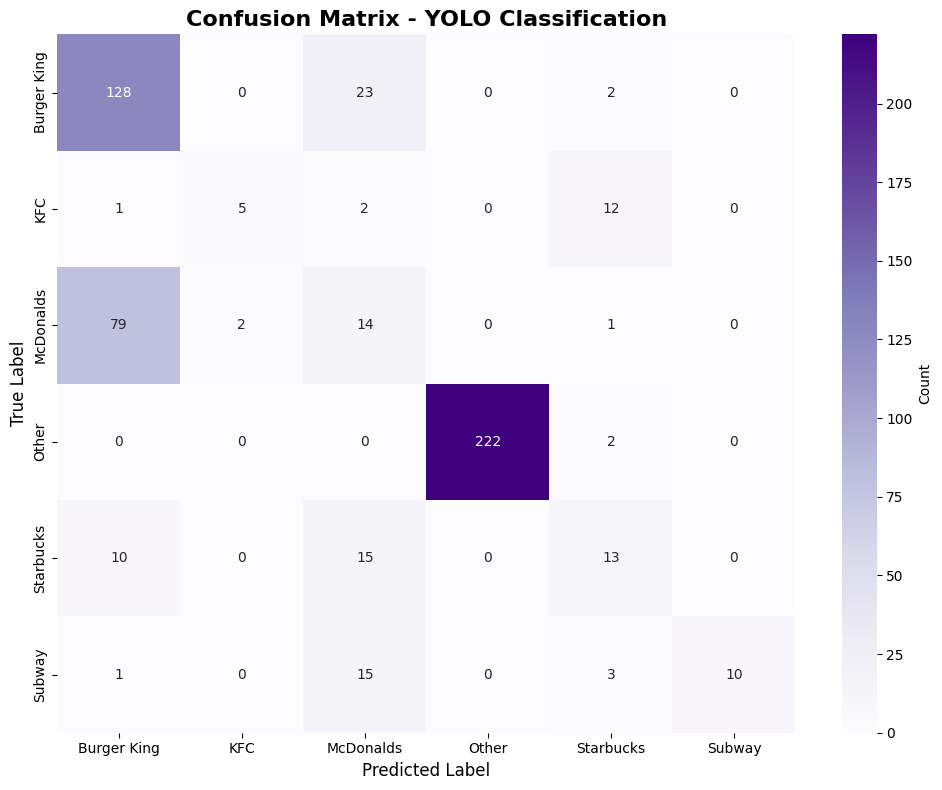

✓ Confusion matrix saved as 'yolo_confusion_matrix.png'

CLASSIFICATION REPORT
              precision    recall  f1-score   support

 Burger King     0.5845    0.8366    0.6882       153
         KFC     0.7143    0.2500    0.3704        20
   McDonalds     0.2029    0.1458    0.1697        96
       Other     1.0000    0.9911    0.9955       224
   Starbucks     0.3939    0.3421    0.3662        38
      Subway     1.0000    0.3448    0.5128        29

    accuracy                         0.7000       560
   macro avg     0.6493    0.4851    0.5171       560
weighted avg     0.6985    0.7000    0.6799       560


TRAINING HISTORY

Training plots saved in: runs/classify/yolo_train
  - results.png: All metrics in one plot
  - confusion_matrix.png: Confusion matrix
  - val_batch0_labels.jpg: Sample validation batch

Displaying training results:


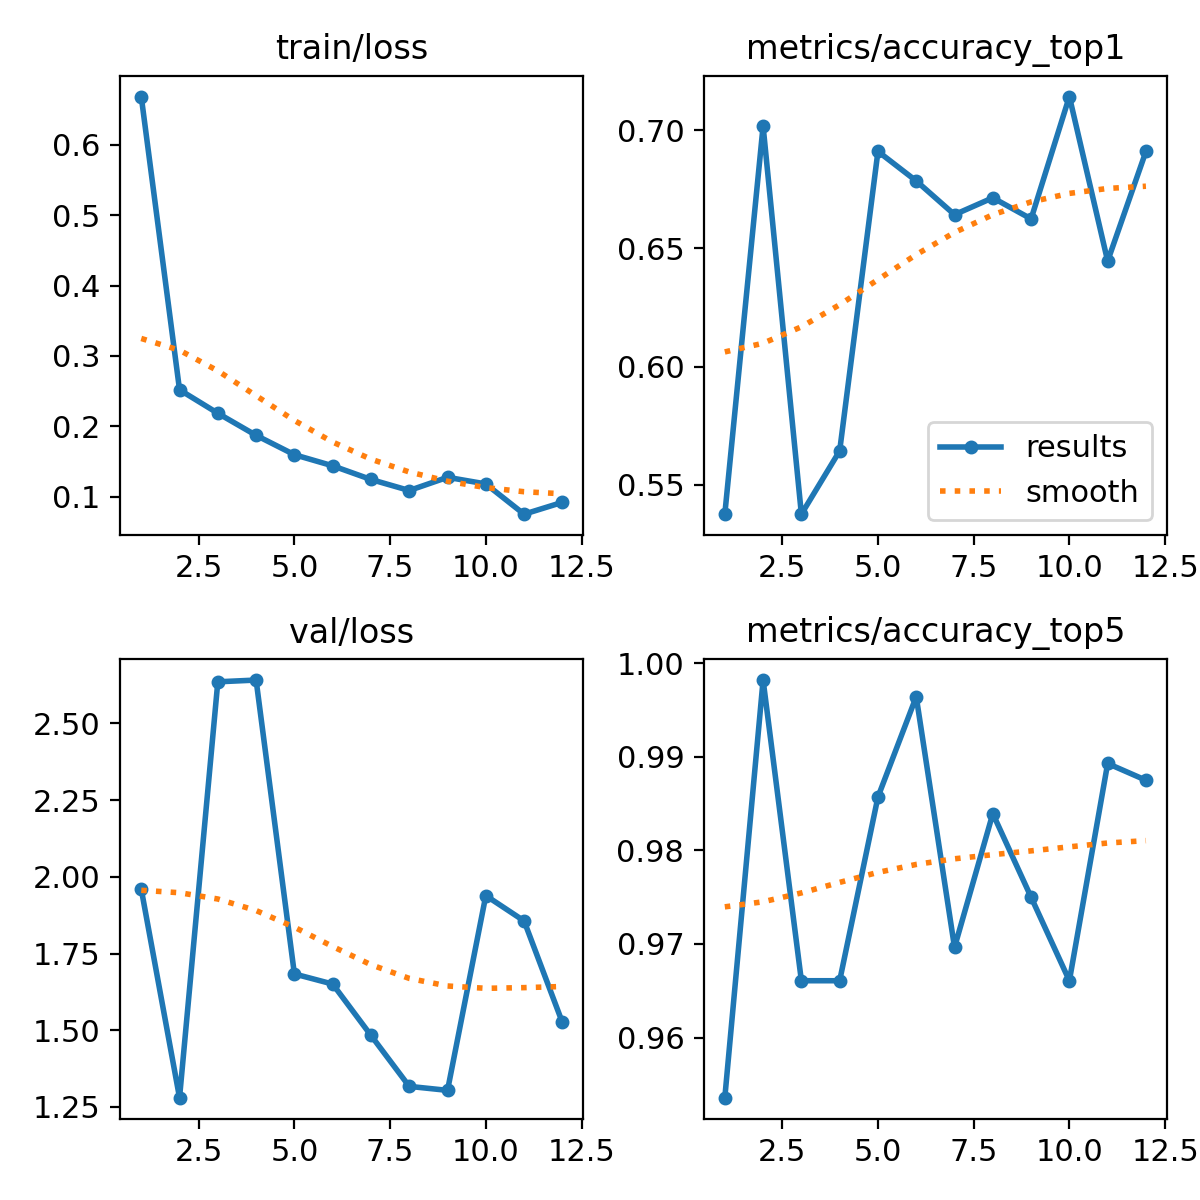


SAMPLE PREDICTIONS

Image: Burger King/armada_image_874.jpg
  True Label: Burger King
  Predicted: Burger King
  Confidence: 0.9945

Image: Burger King/armada_image_893.jpg
  True Label: Burger King
  Predicted: Burger King
  Confidence: 0.9998

Image: Burger King/armada_image_6.jpg
  True Label: Burger King
  Predicted: Burger King
  Confidence: 0.9810

Image: KFC/armada_image_937.jpg
  True Label: KFC
  Predicted: KFC
  Confidence: 0.6817

Image: KFC/armada_image_608.jpg
  True Label: KFC
  Predicted: Starbucks
  Confidence: 0.8540

MODEL ARCHITECTURE DETAILS

Model Parameters:
  Total parameters:      1,533,710
  Trainable parameters:  0
  Model size:            ~5.9 MB

📊 FOR REPORT - SUMMARY TABLE

📈 Performance:
  Test Accuracy:        70.00%
  Precision (Weighted): 0.6985
  Recall (Weighted):    0.7000
  F1-Score (Weighted):  0.6799

🏗️ Architecture:
  Parameters:        1,533,710
  Model Type:        YOLOv11-nano-cls
  Pretrained:        Yes (ImageNet)

⚡ Efficiency:
  Trainin

In [ ]:
# ============================================================================
# YOLO CLASSIFICATION - YOLOv11 for Logo Classification
# Using Ultralytics YOLO for image classification task
# ============================================================================

from google.colab import drive
drive.mount('/content/drive')

import os
from ultralytics import YOLO
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
import torch
from pathlib import Path
import time

print(f"Working directory: {os.getcwd()}")
print(f"Using device: {'cuda' if torch.cuda.is_available() else 'cpu'}")

# ============================================================================
# 1.  SETUP YOLO
# ============================================================================



# Verify installation
from ultralytics import __version__
print(f"\n✓ Ultralytics YOLO version: {__version__}")

# ============================================================================
# 2. DATASET SETUP
# ============================================================================

print("\n" + "="*70)
print("DATASET CONFIGURATION")
print("="*70)

# Dataset path
data_path =  '/content/drive/MyDrive/ene490/archive/logos3'

# Check dataset structure
print(f"\nDataset path: {data_path}")
print("\nDataset structure:")
print(f"  Train: {data_path}/train")
print(f"  Test: {data_path}/test")

# List classes
train_path = os.path.join(data_path, 'train')
classes = sorted(os.listdir(train_path))
print(f"\nClasses found: {classes}")
print(f"Number of classes: {len(classes)}")

# Count images
train_count = sum([len(os.listdir(os.path.join(train_path, c))) for c in classes])
test_path = os.path.join(data_path, 'test')
test_count = sum([len(os.listdir(os.path.join(test_path, c))) for c in classes])

print(f"\nDataset statistics:")
print(f"  Training images: {train_count}")
print(f"  Test images: {test_count}")
print(f"  Total images: {train_count + test_count}")

# ============================================================================
# 3. HYPERPARAMETERS
# ============================================================================

CONFIG = {
    'model': 'yolo11n-cls.pt',    # YOLOv11 nano classification
    'epochs': 50,                  # More epochs for better results
    'imgsz': 224,                  # Image size
    'batch': 32,                   # Batch size
    'patience': 10,                # Early stopping patience
    'optimizer': 'Adam',           # Optimizer
    'lr0': 0.001,                  # Initial learning rate
    'lrf': 0.01,                   # Final learning rate (lr0 * lrf)
    'momentum': 0.937,             # SGD momentum
    'weight_decay': 0.0005,        # Weight decay
    'augment': True,               # Use augmentation
}

print("\n" + "="*70)
print("YOLO CLASSIFICATION - HYPERPARAMETERS")
print("="*70)
for key, value in CONFIG.items():
    print(f"  {key}: {value}")

# ============================================================================
# 4. LOAD YOLO CLASSIFICATION MODEL
# ============================================================================

print("\n" + "="*70)
print("LOADING YOLO CLASSIFICATION MODEL")
print("="*70)

# Load pretrained YOLO classification model
model = YOLO(CONFIG['model'])
print(f"\n✓ Loaded {CONFIG['model']}")

# Model info
print(f"\nModel Information:")
print(f"  Task: Classification")
print(f"  Model: YOLOv11-nano-cls")
print(f"  Pretrained: Yes (ImageNet)")

# ============================================================================
# 5. TRAIN MODEL
# ============================================================================

print("\n" + "="*70)
print("TRAINING YOLO CLASSIFICATION MODEL")
print("="*70)
print("This may take a while depending on your GPU/CPU...")
print("Training will save results to 'runs/classify/train' directory")
print("="*70 + "\n")

# Record training start time
train_start_time = time.time()

# Train the model
results = model.train(
    data=data_path,
    epochs=CONFIG['epochs'],
    imgsz=CONFIG['imgsz'],
    batch=CONFIG['batch'],
    patience=CONFIG['patience'],
    optimizer=CONFIG['optimizer'],
    lr0=CONFIG['lr0'],
    lrf=CONFIG['lrf'],
    momentum=CONFIG['momentum'],
    weight_decay=CONFIG['weight_decay'],
    augment=CONFIG['augment'],
    plots=True,              # Save training plots
    save=True,               # Save checkpoints
    verbose=True,            # Print detailed logs
    device=0 if torch.cuda.is_available() else 'cpu',
    project='runs/classify',
    name='yolo_train'
)

# Calculate training time
train_end_time = time.time()
training_time = (train_end_time - train_start_time) / 60  # in minutes

print("\n" + "="*70)
print("TRAINING COMPLETED!")
print("="*70)
print(f"Training time: {training_time:.1f} minutes")

# ============================================================================
# 6. LOAD BEST MODEL
# ============================================================================

print("\n" + "="*70)
print("LOADING BEST MODEL")
print("="*70)

# Path to best model
best_model_path = 'runs/classify/yolo_train/weights/best.pt'
model = YOLO(best_model_path)
print(f"✓ Loaded best model from: {best_model_path}")

# ============================================================================
# 7. VALIDATION/EVALUATION
# ============================================================================

print("\n" + "="*70)
print("EVALUATING MODEL ON TEST SET")
print("="*70)

# Validate on test set
metrics = model.val(
    data=data_path,
    split='test',
    batch=CONFIG['batch'],
    imgsz=CONFIG['imgsz'],
    plots=True,
    save_json=True
)

# Print metrics
print("\n" + "="*70)
print("EVALUATION METRICS")
print("="*70)
print(f"Top-1 Accuracy: {metrics.top1:.4f} ({metrics.top1*100:.2f}%)")
print(f"Top-5 Accuracy: {metrics.top5:.4f} ({metrics.top5*100:.2f}%)")

# ============================================================================
# 8. DETAILED PREDICTIONS FOR CONFUSION MATRIX & METRICS
# ============================================================================

print("\n" + "="*70)
print("GENERATING DETAILED PREDICTIONS")
print("="*70)

# Predict on test set
test_images_path = os.path.join(data_path, 'test')
y_true = []
y_pred = []
class_names = sorted(os.listdir(test_images_path))

# For inference time measurement
inference_times = []

# Iterate through test images
for class_idx, class_name in enumerate(class_names):
    class_path = os.path.join(test_images_path, class_name)
    image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    for img_file in image_files:
        img_path = os.path.join(class_path, img_file)

        # Measure inference time
        inf_start = time.time()
        result = model(img_path, verbose=False)
        inf_end = time.time()
        inference_times.append((inf_end - inf_start) * 1000)  # in ms

        # Get prediction
        pred_class = result[0].probs.top1

        y_true.append(class_idx)
        y_pred.append(pred_class)

print(f"✓ Processed {len(y_true)} test images")

# Calculate average inference time
avg_inference_ms = np.mean(inference_times)
print(f"✓ Average inference time: {avg_inference_ms:.2f} ms per image")

# ============================================================================
# 9. CALCULATE DETAILED METRICS
# ============================================================================

print("\n" + "="*70)
print("CALCULATING DETAILED METRICS")
print("="*70)

# Calculate precision, recall, f1-score
precision, recall, f1, support = precision_recall_fscore_support(
    y_true, y_pred, average='weighted', zero_division=0
)

# Calculate per-class metrics
precision_per_class, recall_per_class, f1_per_class, _ = precision_recall_fscore_support(
    y_true, y_pred, average=None, zero_division=0
)

print(f"\nWeighted Metrics:")
print(f"  Precision: {precision:.4f}")
print(f"  Recall:    {recall:.4f}")
print(f"  F1-Score:  {f1:.4f}")

# ============================================================================
# 10. CONFUSION MATRIX
# ============================================================================

print("\n" + "="*70)
print("CONFUSION MATRIX")
print("="*70)

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
           xticklabels=class_names, yticklabels=class_names,
           cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - YOLO Classification', fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.savefig('yolo_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Confusion matrix saved as 'yolo_confusion_matrix.png'")

# ============================================================================
# 11. CLASSIFICATION REPORT
# ============================================================================

print("\n" + "="*70)
print("CLASSIFICATION REPORT")
print("="*70)
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

# ============================================================================
# 12. TRAINING HISTORY PLOTS
# ============================================================================

print("\n" + "="*70)
print("TRAINING HISTORY")
print("="*70)

# YOLO automatically saves training plots
results_path = 'runs/classify/yolo_train'
print(f"\nTraining plots saved in: {results_path}")
print("  - results.png: All metrics in one plot")
print("  - confusion_matrix.png: Confusion matrix")
print("  - val_batch0_labels.jpg: Sample validation batch")

# Try to display results if available
try:
    from IPython.display import Image, display
    print("\nDisplaying training results:")
    display(Image(filename=f'{results_path}/results.png'))
except:
    print("\nTraining plots are available in the results directory")

# ============================================================================
# 13. TEST PREDICTIONS ON SAMPLE IMAGES
# ============================================================================

print("\n" + "="*70)
print("SAMPLE PREDICTIONS")
print("="*70)

# Predict on a few sample images
sample_count = 0
max_samples = 5

for class_name in class_names[:2]:  # Show samples from first 2 classes
    class_path = os.path.join(test_images_path, class_name)
    image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))][:3]

    for img_file in image_files:
        if sample_count >= max_samples:
            break

        img_path = os.path.join(class_path, img_file)

        # Predict
        result = model(img_path, verbose=False)

        # Get top prediction
        probs = result[0].probs
        pred_class = class_names[probs.top1]
        confidence = probs.top1conf.item()

        print(f"\nImage: {class_name}/{img_file}")
        print(f"  True Label: {class_name}")
        print(f"  Predicted: {pred_class}")
        print(f"  Confidence: {confidence:.4f}")

        sample_count += 1

# ============================================================================
# 14. MODEL SIZE & PARAMETERS
# ============================================================================

print("\n" + "="*70)
print("MODEL ARCHITECTURE DETAILS")
print("="*70)

# Get model parameters
total_params = sum(p.numel() for p in model.model.parameters())
trainable_params = sum(p.numel() for p in model.model.parameters() if p.requires_grad)
param_size_mb = (total_params * 4) / (1024 * 1024)  # Assuming float32

print(f"\nModel Parameters:")
print(f"  Total parameters:      {total_params:,}")
print(f"  Trainable parameters:  {trainable_params:,}")
print(f"  Model size:            ~{param_size_mb:.1f} MB")

# ============================================================================
# 15. SUMMARY FOR REPORT (NEW - MATCHING RESNET50 FORMAT)
# ============================================================================

final_val_acc = metrics.top1 * 100  # Convert to percentage

print("\n" + "="*70)
print("📊 FOR REPORT - SUMMARY TABLE")
print("="*70)
print("\n📈 Performance:")
print(f"  Test Accuracy:        {final_val_acc:.2f}%")
print(f"  Precision (Weighted): {precision:.4f}")
print(f"  Recall (Weighted):    {recall:.4f}")
print(f"  F1-Score (Weighted):  {f1:.4f}")

print("\n🏗️ Architecture:")
print(f"  Parameters:        {total_params:,}")
print(f"  Model Type:        YOLOv11-nano-cls")
print(f"  Pretrained:        Yes (ImageNet)")

print("\n⚡ Efficiency:")
print(f"  Training Time:     {training_time:.1f} min")
print(f"  Inference Time:    {avg_inference_ms:.2f} ms per image")
print(f"  Memory Usage:      ~{param_size_mb:.1f} MB")

print("\n" + "="*70)
print("📋 COPY THIS FOR YOUR COMPARISON TABLE:")
print("="*70)
print(f"Model: YOLOv11-nano-cls")
print(f"Test Accuracy:         {final_val_acc:.2f}%")
print(f"Precision (Weighted):  {precision:.4f}")
print(f"Recall (Weighted):     {recall:.4f}")
print(f"F1-Score (Weighted):   {f1:.4f}")
print(f"Parameters:            {total_params:,}")
print(f"Model Type:            YOLOv11-nano")
print(f"Pretrained:            Yes")
print(f"Inference (ms):        {avg_inference_ms:.2f}")
print("="*70)

# ============================================================================
# 16. SAVE FINAL RESULTS
# ============================================================================

print("\n" + "="*70)
print("SAVING RESULTS")
print("="*70)

# Save comprehensive results
final_results = {
    'model': 'YOLOv11-nano-cls',
    'test_accuracy': float(final_val_acc),
    'top5_accuracy': float(metrics.top5 * 100),
    'precision_weighted': float(precision),
    'recall_weighted': float(recall),
    'f1_weighted': float(f1),
    'total_parameters': int(total_params),
    'trainable_parameters': int(trainable_params),
    'model_size_mb': float(param_size_mb),
    'training_time_minutes': float(training_time),
    'avg_inference_ms': float(avg_inference_ms),
    'epochs_trained': CONFIG['epochs'],
    'best_model_path': best_model_path,
    'hyperparameters': CONFIG
}

import json
with open('yolo_results.json', 'w') as f:
    json.dump(final_results, f, indent=4)

print("✓ Results saved as 'yolo_results.json'")
print(f"✓ Best model saved at: {best_model_path}")
print(f"✓ Training logs and plots in: {results_path}")

print("\n" + "="*70)
print("ALL YOLO TASKS COMPLETED!")
print("="*70)